In [56]:
%pylab inline

import pandas as pd
from scipy import optimize

import os

import csv

from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Estrutura hiperfina do estado fundamental do átomo de rubídio
Nesse experimento iremos analisar a estrutua hiperfina de isótopos de rubídio através dos padrões de absorção de fótons provenientes de um laser de diodo. Utilizamos um método que nos permita eliminar o chamado "alargamento Doppler", fazendo uma melhor identificação das transições, além de apresentar esse efeito. 



## 1 - Introdução

  A estrutura hiperfina de um átomo foi observada pela primeira vez por Michelson and Morley, em suas análises do espectro do Tálio utilizando um inteferômetro criado por Michelson, de uma importancia fundamental para o desenvolvimento da mecânica quântica. Foi encontrado inesperados desdobramentos nos níveis de energia, com pequenas diferenças de energia. Esse fenômeno foi explicado posteriormente, com a descoberta do spin nuclear, primeiramente sugerido por Pauli, e depois decoberto por David M. Dennison em seu trabalho sobre anomalias no comportamento do calor específico do hidrogênio molecular.
  
  Todo núcleo atômico possui uma magnetização intrísseca com momento magnético dado por

$$
          \mu_I = g_l \frac{m_e I}{m_p \hbar};
$$
onde $ g_l$ é uma constante determinada experimentalmente, $m_p$ a massa de repouso do próton, e $I$ é uma nova variável quântica chamada Spin Nuclear, com módulo dado por

$$
I^2 = \hbar^2 i(i+1);
$$
sendo $i$ o número quântico de spin.

Ocorre então um acoplamento spin-spin entre o núcleo e os elétrons e, devido a isso, nós teremos um novo momento angular total dado por:
$$
              F = I + J,
$$
com módulo

$$
      F^2 = \hbar^2 f(f+1), 
$$

podendo o númeor quântico $f$ assumir os valores

$$
        f = i \pm \frac{1}{2}
$$

Por exemplo, para os níveis com número quântico anguolar $l=0$, a variação de energia no desdobramento será dada pelo valor esperado de 

$$
        \Delta E = \frac{1}{4\pi \varepsilon _0 c^2} \frac{g_s g_I}{3} \left(\frac{e}{2m_e}   \right)^2 \frac{m_e}{m_p} (F^2 - J^2) \nabla^2 \frac{1}{r}.
$$
$$$$$$$$


Ao incidir ondas eletromagnéticas sobre uma amostra, esperamos ver um decréscimo abrupto na itensidade para determinados valores de frequência incidente, conforme à variamos. Mas observaremos nesse experimento que existe um alargamento nesses picos. Isso acontece devido a uma variação na percepção da frequência da luz incidente $\nu_L$, pelos átomos da amostra, no referencial do laboratório. Assim, sendo $v_z$ uma componente da velocidade de um átomo, a frequência percebida devido ao chamado alargamento Doppler será:

$$
          \nu = \nu_L \left[  1 - \frac{v_z}{c} \right]
$$
A distribuição do espectro de absorção assume então uma forma gaussiana com largura de frequência à meia altura dada por:
$$
        \Delta \nu = 2 \nu_0 \sqrt\frac{2k_BTln2}{mc^2} \approx 500,
$$
em megahertz. Onde $\nu_0$ é a frequência de ressonância no repouso.
$$$$

As aplicações que surgiram das medições cada vez mais refinadas desse fenômeno são diversas. Além das áreas de astronomia, eletrodinâmica e computação quântica, também é usado em relógios atômicos e na espectroscopia nuclear. Outra aplicação é na separação de isótopos no método AVLIS, onde devido a ligeiras diferenças no espectro, o isótopo de interesse pode ser selecionado para ionização, separando-os facilmente em seguida. 




## 2 - Metodologia


  Nesse experimento, analisaremos um gás de rubídio que majoritariamente é composto pelos isótopos 85 (72%) com i = 5/2 e do 87 (28%) com i = 3/2. Identificaremos as transições correspondentes a cada isótopo, que vão dos estados fundamentas aos primeiros estados excitados.

  É utilizado um laser de diodo de 780 nm e largura de linha 1 MHz, com frequência variável a partir de uma corrente de alimentada por um gerador de funções. O feixe do laser é direcionado a uma célula contendo vapor de rubídio, e após a absorção para as consequentes transições dos átomos, o feixe vai em direção a um detector, onde esses sinais são observados em um osciloscópio.




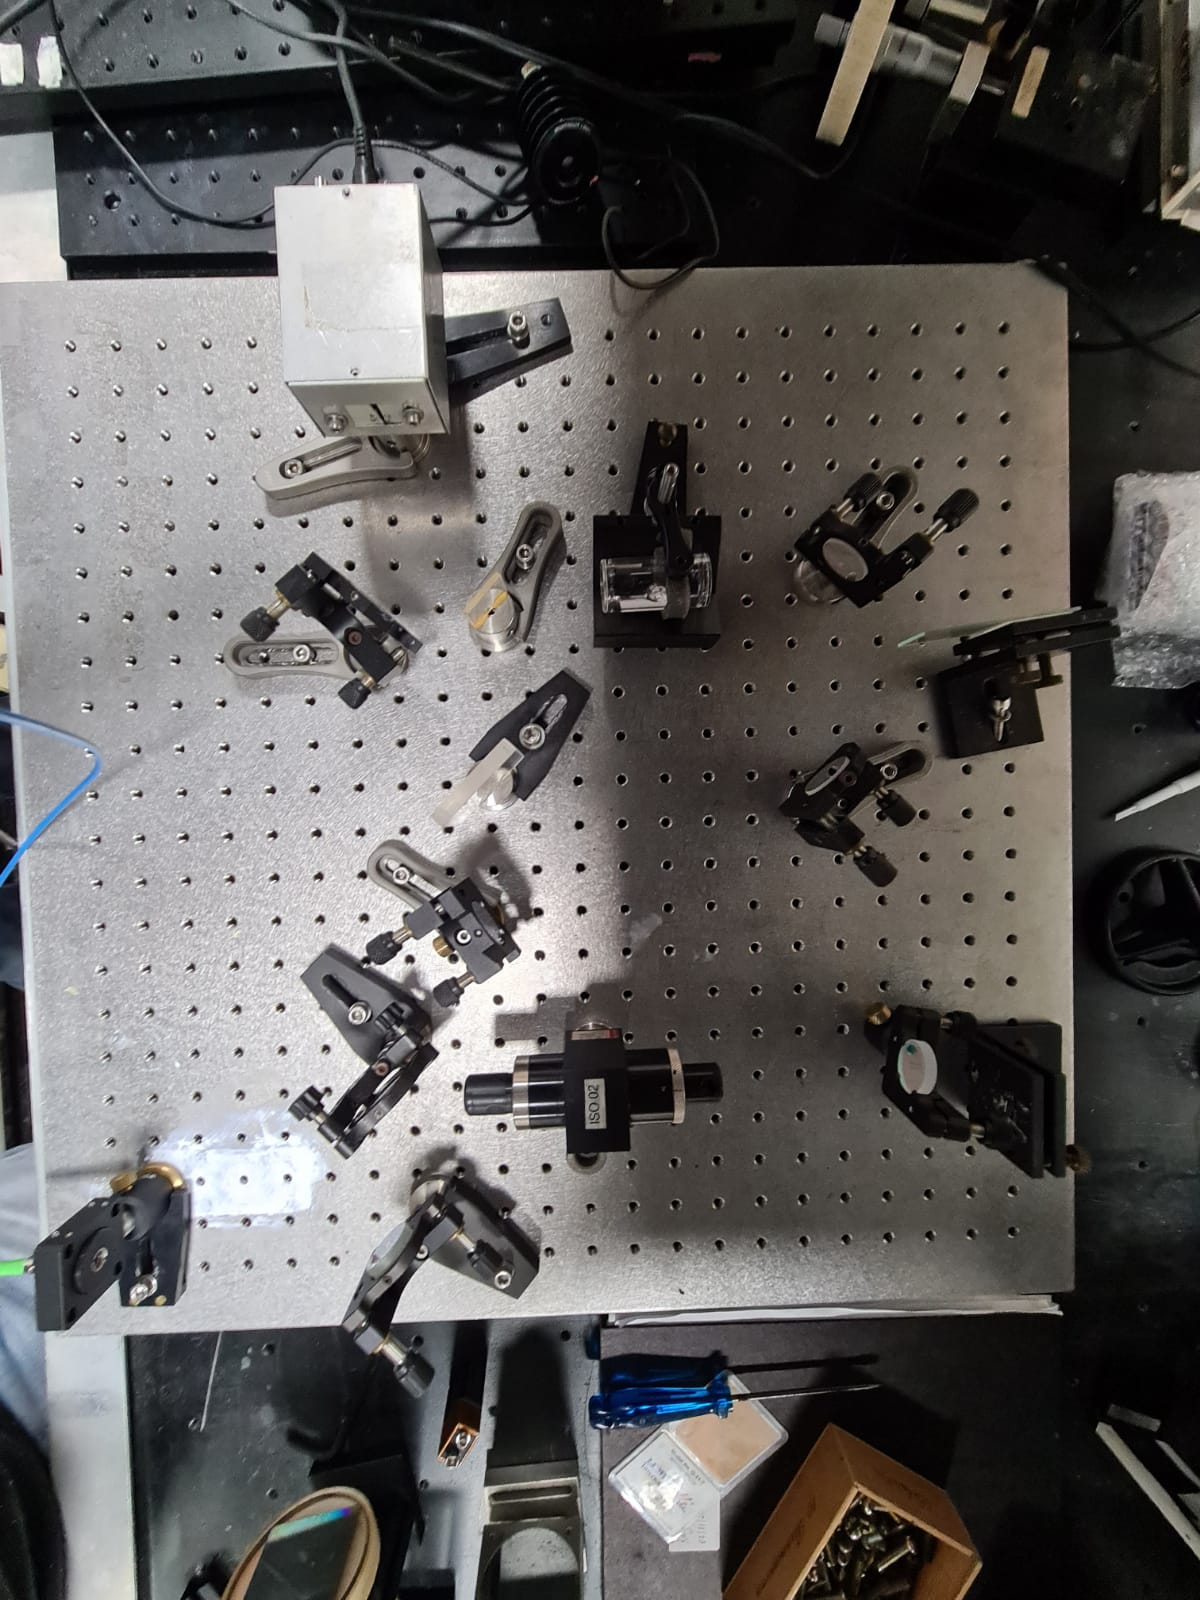


Figura 1.

  Devido ao alargamento doppler citado anteriormente, não podemos analisar sistematicamente transições mais sutis. Por isso, iremos saturar a absorção, de forma que as transições relacionadas ao alargamento doppler sejam ignoradas. Isso é feito através de um arranjo de espelhos no sistema, que direciona o feixe inicial em direções opostas e depois os redirecionam em sentidos opostos, com o feixe de menor itensidade sendo o único a ser medido. Desse jeito, selecionamos os átomos que possuem velocidades perpendiculares aos feixes, sendo essas as transições observadas no osciloscópio.

  Desta maneira, iremos expor as estruturas hiperfinas incorporadas nas estruturas finas dos níveis $5S_{1/2}$, $5P_{1/2}$ e $5P_{3/2}$ dos isótopos.

## 3 - Resultados



### 3.1 - Absorção Linear
  Dos dados coletados, primeiramente sem saturação, a absorção em função do tempo fica:

,second,Volt,Volt2
count,2000.000000,2000.000000,2000.000000
mean,-0.000125,0.050685,0.596073
std,0.144374,0.004638,2.605986
min,-0.250000,0.037789,-4.743718
25%,-0.125062,0.048241,-1.447236
50%,-0.000125,0.051457,0.884422
75%,0.124812,0.053869,2.814070
max,0.249750,0.057487,4.582914


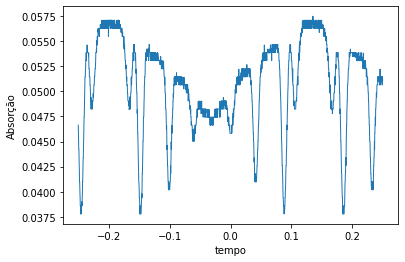

In [57]:
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv")
#print(dataframe.head(10))
t = dataframe.second
V1 = dataframe.Volt
V2 = dataframe.Volt2

plt.ylabel('Absorção')
plt.xlabel('tempo')

plt.plot(t, V1, linewidth=1.0)

dataframe.describe()

Gráfico 1.

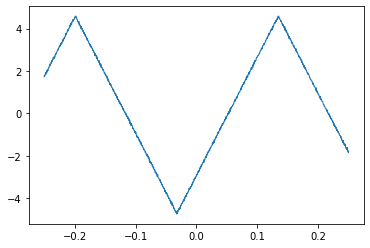

In [58]:
plt.plot(t, V2, linewidth=1.0)

Gráfico 2.

$$$$
Como a onda triangular é periódica, limitamos o intervalo de interesse:
$$$$

In [59]:
dataframe[dataframe['Volt2'] <= -4.743717 	] 

,second,Volt,Volt2
870,-0.03250,0.046633,-4.743718
873,-0.03175,0.046985,-4.743718


In [60]:

dataframe[dataframe['Volt2'] >= 4.582913	]

,second,Volt,Volt2
203,-0.19925,0.056633,4.582914
205,-0.19875,0.056633,4.582914
206,-0.19850,0.057085,4.582914
208,-0.19800,0.057085,4.582914
1536,0.13400,0.057035,4.582914
1537,0.13425,0.057085,4.582914
1540,0.13500,0.057085,4.582914
1541,0.13525,0.057487,4.582914


Portanto, analisaremos o intervalo [-0.03175, 0.13400]. Nos levando a:

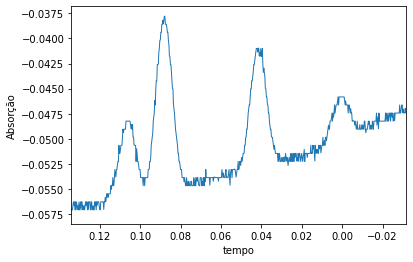

In [61]:
plt.ylabel('Absorção')
plt.xlabel('tempo')

#plt.xlim(-0.03175, 0.13400)
plt.xlim(0.13400, -0.03175)
plt.plot(t, -V1, linewidth=1.0)

Gráfico 3.

Onde alguns ajustes foram feitos para comparação com a figura 2.

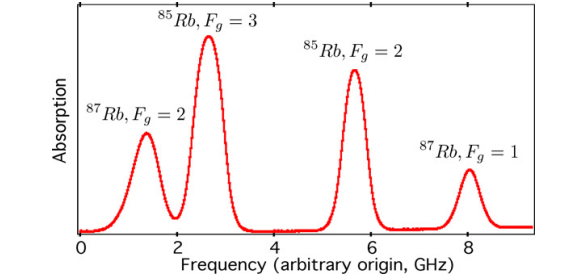


Figura 2.

Nessa figura, vemos o espectro de absorção relacionado as transições entre os níveis $5S_{1/2}$  e $5P_{3/2}$. Como sabemos que as diferenças de energia nos estados fundamentais dos dois isótopos são cerca de 100 vezes maiores que no nível $5P_{3/2}$, podemos desconsiderar por hora os subníveis devido a estrutura hiperfina nesse nível excitado. Assim, as frequências associadas as diferenças de energia nos estados fundamentais podem ser calculadas simplesmete subtraindo as frequências das transições consecutivas, para cada isótopo. Usaremos o dado $3,02 \pm 0,03$ GHz para essa diferena no rubídio 85, para transformar a escala temporal em de frequência. Do Gráfico 3, vamos procular os valores correspondentes a essa transição nos intervalos [0,1 ; 0,08] para a transição a partir do nível com f = 3, e [0,05 ; 0,03] para f = 2:

In [62]:
dataframe[0.08==dataframe['second'] ]



,second,Volt,Volt2
1320,0.08,0.053065,1.527638


In [63]:
dataframe[dataframe['second']==0.1 ]

,second,Volt,Volt2
1400,0.1,0.053065,2.653266


In [64]:
rows_to_keep = pd.Interval(1320, 1400)
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep)

dataframe.describe()

,+80.0000E-03,+53.0653E-03,+1.5276382E+00
count,79.000000,79.000000,79.000000
mean,0.090000,0.046727,2.104510
std,0.005737,0.005793,0.325864
min,0.080250,0.037789,1.527638
25%,0.085125,0.041206,1.849246
50%,0.090000,0.047437,2.090452
75%,0.094875,0.052261,2.371859
max,0.099750,0.054673,2.653266


In [65]:
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv")
dataframe[0.05==dataframe['second'] ]


,second,Volt,Volt2
1200,0.05,0.052261,-0.160804


In [66]:
dataframe[0.03==dataframe['second'] ]

,second,Volt,Volt2
1120,0.03,0.052211,-1.281407


In [67]:
rows_to_keep = pd.Interval(1120, 1200)
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep)

dataframe.describe()

,+30.0000E-03,+52.2111E-03,-1.2814070E+00
count,79.000000,79.000000,79.000000
mean,0.040000,0.046956,-0.682336
std,0.005737,0.003991,0.321232
min,0.030250,0.040955,-1.206030
25%,0.035125,0.043166,-0.964824
50%,0.040000,0.047437,-0.643216
75%,0.044875,0.050854,-0.402010
max,0.049750,0.052261,-0.160804


Onde a absorção é maior para o menor valor, ou seja, 0,037789 em f=3 e 0,040955 para f=2. Nos levando a:

In [68]:
rows_to_keep = pd.Interval(1320, 1400)
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep)
dataframe[0.037789>=dataframe['+53.0653E-03'] ]



,+80.0000E-03,+53.0653E-03,+1.5276382E+00
30,0.08775,0.037789,1.929648
31,0.08800,0.037789,2.005025


In [69]:
rows_to_keep = pd.Interval(1120, 1200)
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep)
dataframe[0.040955>=dataframe['+52.2111E-03'] ]

,+30.0000E-03,+52.2111E-03,-1.2814070E+00
45,0.0415,0.040955,-0.562814


Logo, as transições ocorrem nos tempos 0,0415 (f=2) e 0.08800 (f=3). 

Assim, do valor para a diferena de energia já citada, do estado fundamental do rubídio 85, podemos estabelecer a dependência linear entre o tempo de e a variação de frequência, que é constante devido a ação do gerador de funções:

$$
        \nu -  0 = \frac{3,02}{0,0465} [(t' - (-0,03175)],
$$
$$$$
$$
   ->       \nu = 64,94623656t' + 2,062043011,
$$
em GHz. Onde usamos $$
                t' \equiv t - 0,03175,
$$
$$$$
Temos então:
$$$$


*************incerteza




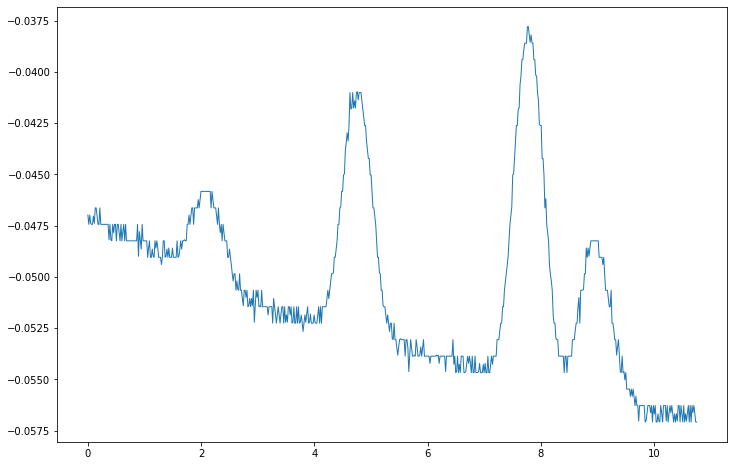

In [70]:
rows_to_keep = pd.Interval(872, 1536)
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep)

dataframe2 = 64.95*(dataframe['-32.0000E-03'] + 0.03175)
dataframe3 = dataframe['+46.6332E-03']

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

#df['Frquência'] = dataframe2

#plot((-df + 10), -dataframe3, linewidth=1.0)

plot(dataframe2,-dataframe3, linewidth=1.0 )


Com essa calibração, nós podemos obter a diferênça de energia da estrutura hiperfina no estado fundamental do rubídio 87. Primeiramente, calculamos as frequências de grande absorção nos outros dois picos:

In [122]:
rows_to_keep = pd.Interval(900, 1060) #Aqui decido em qual intervalo de tempo deve estar a transição, com base no último gráfico e na quantidade de dados.
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep, names=['segundos', 'Absorção', 'Volts'])

dataframe.describe()




,segundos,Absorção,Volts
count,160.000000,160.000000,160.000000
mean,-0.005125,0.048420,-3.217337
std,0.011583,0.001490,0.649599
min,-0.025000,0.045829,-4.341709
25%,-0.015062,0.047437,-3.778894
50%,-0.005125,0.048241,-3.216080
75%,0.004812,0.049045,-2.653266
max,0.014750,0.052211,-2.090452


In [117]:
rows_to_keep = pd.Interval(900, 1060) #Aqui decido em qual intervalo de tempo deve estar a transição, com base no último gráfico e na quantidade de dados.
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep, names=['segundos', 'Absorção', 'Volts'])

dataframe[dataframe['Absorção']<= 0.045830	]
#dataframe

,segundos,Absorção,Volts
96,-0.00100,0.045829,-2.974874
97,-0.00075,0.045829,-2.974874
98,-0.00050,0.045829,-2.974874
99,-0.00025,0.045829,-2.974874
100,0.00000,0.045829,-2.894472
101,0.00025,0.045829,-2.934673
102,0.00050,0.045829,-2.894472
103,0.00075,0.045829,-2.894472
104,0.00100,0.045829,-2.894472
105,0.00125,0.045829,-2.854271


Assim, a transição ocorre quando t = 0.00050:
$$$$
$$
            \nu = 64,94623656t' = 64,94623656(0.00050 + 0,03175) = 2,09451 ;
$$$$$em GHz.

Na segunda transição:


In [118]:
rows_to_keep = pd.Interval(1300, 1500)
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep, names=['segundos', 'Absorção', 'Volts'])

dataframe.describe()


,segundos,Absorção,Volts
count,200.000000,200.000000,200.000000
mean,0.099875,0.050751,2.654020
std,0.014470,0.005358,0.806751
min,0.075000,0.037789,1.286432
25%,0.087437,0.048241,1.929648
50%,0.099875,0.052261,2.653266
75%,0.112312,0.054673,3.341709
max,0.124750,0.057085,4.020100


In [120]:
rows_to_keep = pd.Interval(1300, 1500)
rows_to_keep
dataframe = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/0_Absorção_linear.csv", skiprows = lambda x: x not in rows_to_keep, names=['segundos', 'Absorção', 'Volts'])

dataframe[dataframe['Absorção']<= 0.037789]

,segundos,Absorção,Volts
51,0.08775,0.037789,1.929648
52,0.08800,0.037789,2.005025


$$$$
$$
  -> \nu = 64,94623656t' = 64,94623656(0,08800 + 0,03175) = 7,7773;
$$
em GHz.
$$$$


Assim, do mesmo modo que fizemos para o rubídio 85, a diferença no estado fundamental do rubídio 87, devido ao fenômeno de acoplamento de spins nuclear e eletrônico, deve ser aproximadamente
$$$$
$$
         \Delta \nu = 7,7773 - 2,09451 = 5,68279;
$$
$$$$
em GHz, que nos leva a uma diferença de energia:
$$$$
$$
        \Delta E = h \Delta \nu = 3,76769 * 10^{-24};
$$
em Joules.


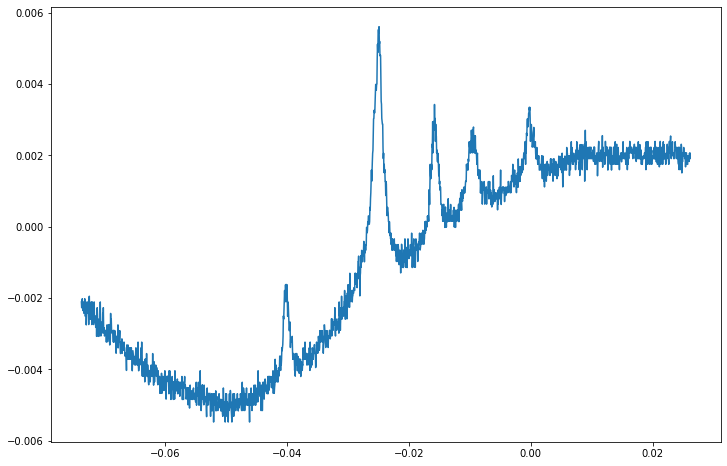

In [121]:
dataframe4 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/2_Rb87_F2.csv", names=['segundos', 'Absorção', 'Volts'], skiprows = 3)
dataframe4
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

plot(dataframe4['segundos'], dataframe4['Absorção'])


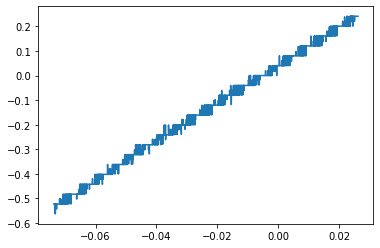

In [75]:
plot(dataframe4['segundos'], dataframe4['Volts'])

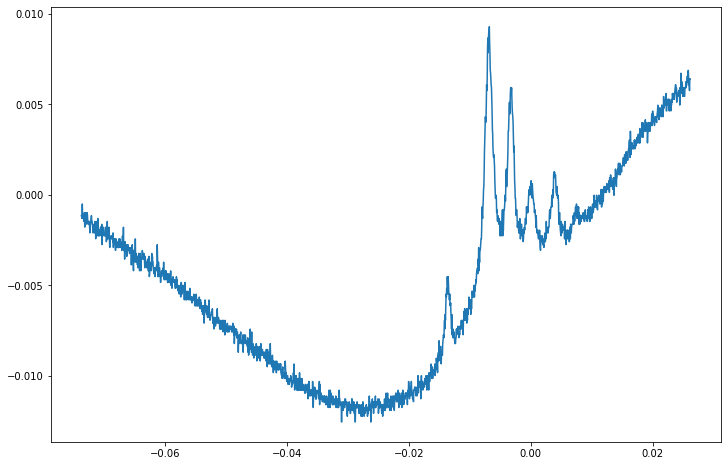

In [76]:
dataframe4 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/3_Rb85_F3.csv", names=['segundos', 'Absorção', 'Volts'], skiprows = 3)
dataframe4
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

plot(dataframe4['segundos'], dataframe4['Absorção' ])

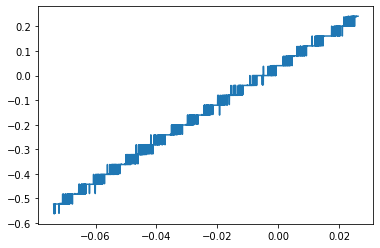

In [77]:
plot(dataframe4['segundos'], dataframe4['Volts'])

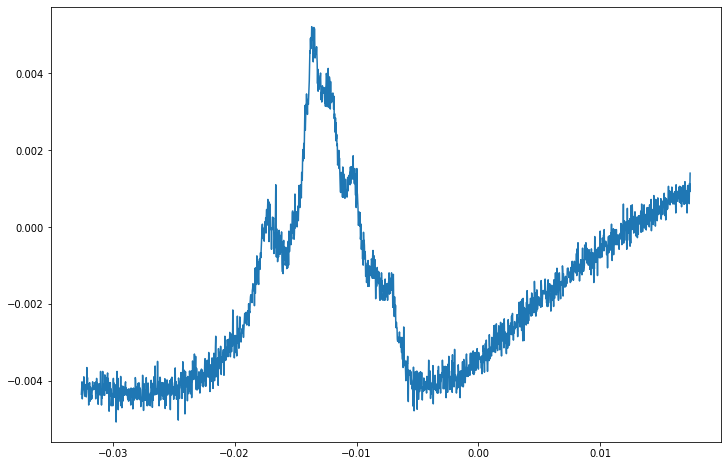

In [78]:
dataframe4 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/4_Rb85_F2.csv", names=['segundos', 'Absorção', 'Volts'], skiprows = 3)
dataframe4
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

plot(dataframe4['segundos'], dataframe4['Absorção' ])

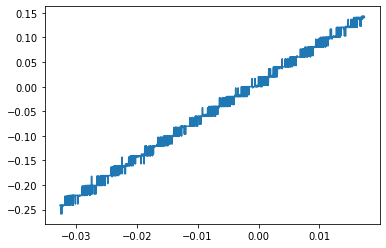

In [79]:
plot(dataframe4['segundos'], dataframe4['Volts'])

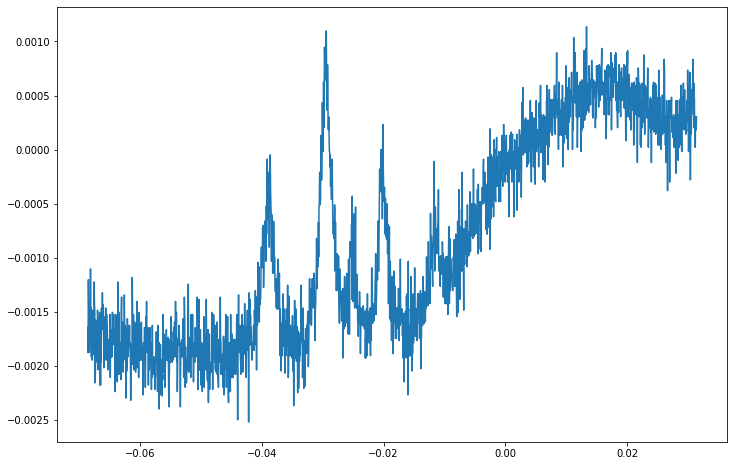

In [80]:
dataframe4 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/5_Rb87_F1.csv", names=['segundos', 'Absorção', 'Volts'], skiprows = 3)
dataframe4
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

plot(dataframe4['segundos'], dataframe4['Absorção' ])

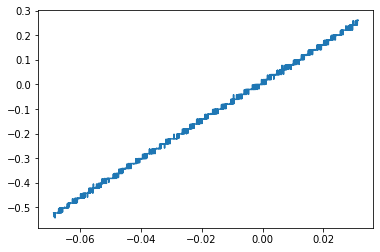

In [81]:
plot(dataframe4['segundos'], dataframe4['Volts'])

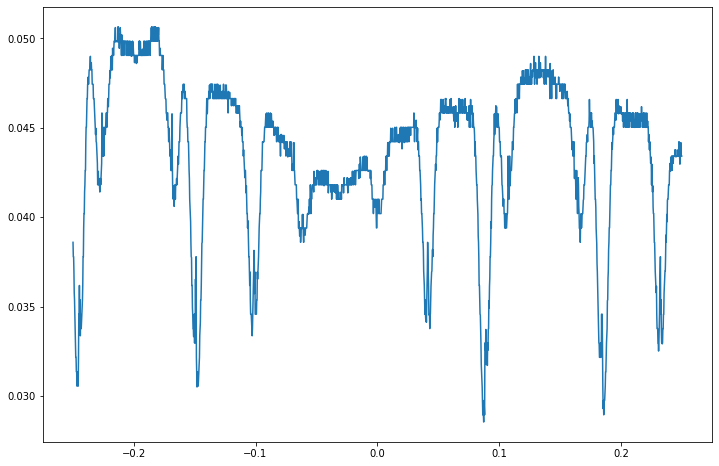

In [82]:
dataframe4 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/E4/1_Absorção_saturada.csv", names=['segundos', 'Absorção', 'Volts'], skiprows = 3)
dataframe4
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

plot(dataframe4['segundos'], dataframe4['Absorção' ])

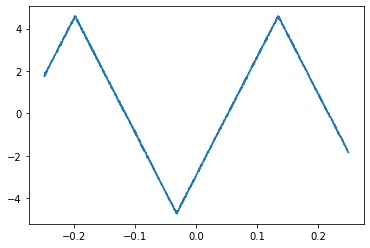

In [83]:
plot(dataframe4['segundos'], dataframe4['Volts'])

# 5 - Referências

Notas de aula

https://en.wikipedia.org/wiki/Hyperfine_structure

Jacques, V., Hingant, B., Allafort, A., Pigeard, M., & Roch, J. F. (2009). Nonlinear spectroscopy of rubidium: an undergraduate experiment. European Journal of Physics, 30(5), 921–934.

Shankland, R. S. (1974). Michelson and his interferometer. Physics Today, 27(4), 37–43.

Goudsmit, S. A. (1961). Pauli and nuclear spin. Physics Today, 14(6), 18–21.

Introduction to the structure of matter a course in modern phys

https://en.wikipedia.org/wiki/Atomic_vapor_laser_isotope_separation

https://pt.wikipedia.org/wiki/Gerador_de_fun%C3%A7%C3%B5es





